## Cargar los datos (Imágenes)

from google.colab import drive
drive.mount('/content/drive')


In [1]:
data_dir = "images/"

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.25  
)

#### Datos de entrenamiento

In [3]:

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  
    subset='training'  
)

Found 4785 images belonging to 16 classes.


#### Datos de validación

In [4]:

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

Found 1594 images belonging to 16 classes.


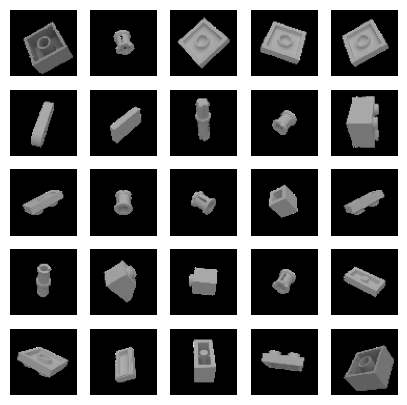

In [5]:

fig, axes = plt.subplots(5, 5, figsize=(5, 5))


for i in range(5):
    for j in range(5):

        batch = next(train_generator)
        images, _ = batch

        ax = axes[i, j]
        ax.imshow(imag

plt.show()

## Modelos

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np

epochs = 2


#### Modelo 1

In [7]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='softmax')
])

In [8]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model1, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
history1 = model1.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/2
150/150 [==============================] - 40s 245ms/step - loss: 1.1275 - accuracy: 0.6130 - val_loss: 0.9096 - val_accuracy: 0.6926
Epoch 2/2
150/150 [==============================] - 35s 230ms/step - loss: 0.5157 - accuracy: 0.8199 - val_loss: 0.9286 - val_accuracy: 0.7535


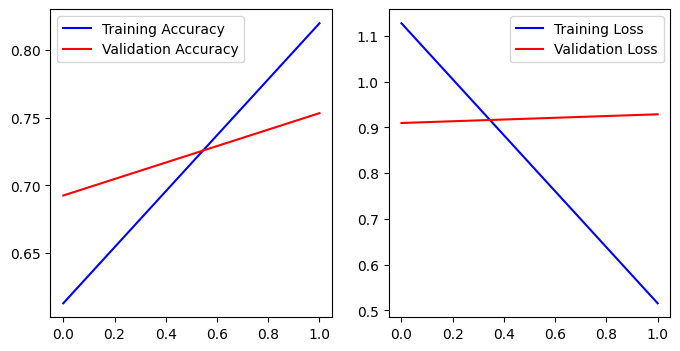

In [10]:
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
epoch=range(len(acc))
loss=history1.history['loss']
val_loss=history1.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()
     

In [11]:
predictions = model1.predict(validation_generator)
predicted_class_indices = np.argmax(predictions, axis=1)
     

50/50 [==============================] - 8s 153ms/step


1/1 [==============================] - 1s 755ms/step
[12 11 10 10  9  2  7  6  8  3  5 12  3 13 14  9  5  7 14 12 14  9  6 15
 12  7 10  0  5  1  6 14]
{'11214 Bush 3M friction with Cross axle': 0, '18651 Cross Axle 2M with Snap friction': 1, '2357 Brick corner 1x2x2': 2, '3003 Brick 2x2': 3, '3004 Brick 1x2': 4, '3005 Brick 1x1': 5, '3022 Plate 2x2': 6, '3023 Plate 1x2': 7, '3024 Plate 1x1': 8, '3040 Roof Tile 1x2x45deg': 9, '3069 Flat Tile 1x2': 10, '32123 half Bush': 11, '3673 Peg 2M': 12, '3713 Bush for Cross Axle': 13, '3794 Plate 1X2 with 1 Knob': 14, '6632 Technic Lever 3M': 15}


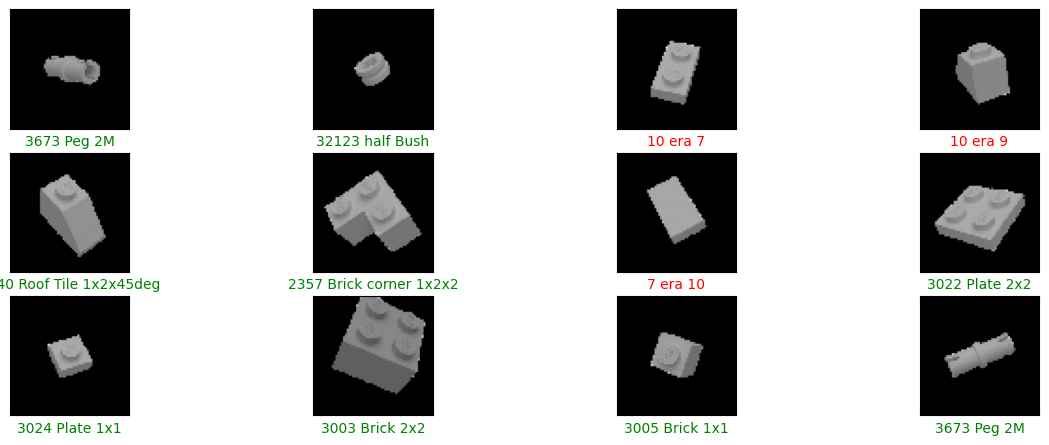

In [12]:
plt.figure(figsize=(15,9))


batch = next(validation_generator)
images, true_labels = batch

predictions = model1.predict(images)
predicted_class_indices = np.argmax(predictions, axis=1)
true_labels = np.argmax(true_labels, axis=1)

print(predicted_class_indices)
print(validation_generator.class_indices)

classes = {v: k for k, v in validation_generator.class_indices.items()}


for i in range(12):
    plt.subplot(5, 4, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])

    if predicted_class_indices[i] == true_labels[i]:
        plt.xlabel(f'{classes.get(true_labels[i], None)}', color='green')
    else:
        plt.xlabel(f'{predicted_class_indices[i]} era {true_labels[i]}', color='red')

plt.show()

### Modelo 2

In [13]:

input_shape = (64, 64, 3)
input_layer = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
conv1 = layers.MaxPooling2D((2, 2))(conv1)

conv2 = layers.Conv2D(64, (3, 3), activation='relu')(input_layer)
conv2 = layers.MaxPooling2D((2, 2))(conv2)

merged = layers.Concatenate()([conv1, conv2])

flatten = layers.Flatten()(merged)

fc1 = layers.Dense(64, activation='relu')(flatten)

output_layer = layers.Dense(16, activation='softmax')(fc1)

model2 = models.Model(inputs=input_layer, outputs=output_layer)

In [14]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model2, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
history2 = model2.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/2
150/150 [==============================] - 37s 222ms/step - loss: 0.8946 - accuracy: 0.7070 - val_loss: 0.7368 - val_accuracy: 0.7171
Epoch 2/2
150/150 [==============================] - 27s 176ms/step - loss: 0.3068 - accuracy: 0.8938 - val_loss: 0.6307 - val_accuracy: 0.7735


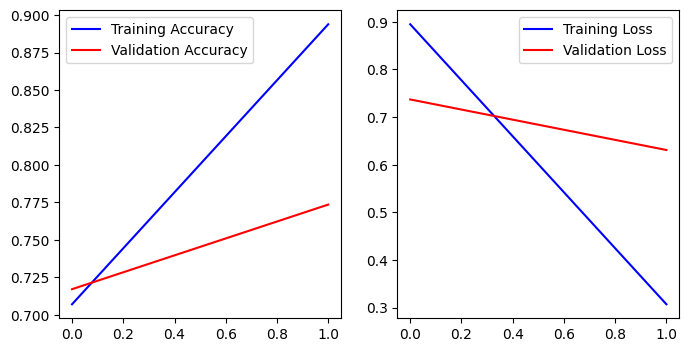

In [16]:
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
epoch=range(len(acc))
loss=history2.history['loss']
val_loss=history2.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [17]:
predictions = model2.predict(validation_generator)
predicted_class_indices = np.argmax(predictions, axis=1)

50/50 [==============================] - 3s 65ms/step


1/1 [==============================] - 0s 131ms/step
[ 8  2  6  1 13  5 15  7  0 12 12 13 14 12  6  8  2  3 11  9  9  9 12 12
  2 15  8  5 13 13 10  0]
{'11214 Bush 3M friction with Cross axle': 0, '18651 Cross Axle 2M with Snap friction': 1, '2357 Brick corner 1x2x2': 2, '3003 Brick 2x2': 3, '3004 Brick 1x2': 4, '3005 Brick 1x1': 5, '3022 Plate 2x2': 6, '3023 Plate 1x2': 7, '3024 Plate 1x1': 8, '3040 Roof Tile 1x2x45deg': 9, '3069 Flat Tile 1x2': 10, '32123 half Bush': 11, '3673 Peg 2M': 12, '3713 Bush for Cross Axle': 13, '3794 Plate 1X2 with 1 Knob': 14, '6632 Technic Lever 3M': 15}


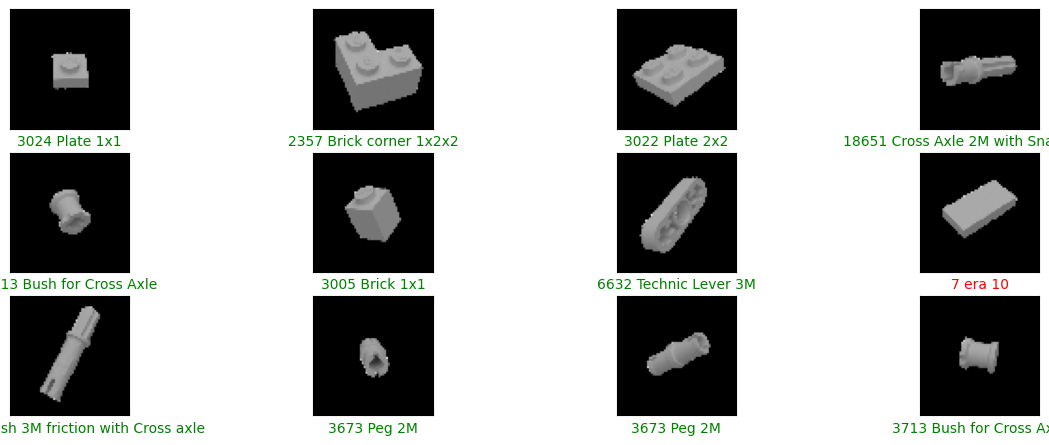

In [18]:
plt.figure(figsize=(15,9))


batch = next(validation_generator)
images, true_labels = batch

predictions = model2.predict(images)
predicted_class_indices = np.argmax(predictions, axis=1)
true_labels = np.argmax(true_labels, axis=1)

print(predicted_class_indices)
print(validation_generator.class_indices)

classes = {v: k for k, v in validation_generator.class_indices.items()}


for i in range(12):
    plt.subplot(5, 4, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])

    if predicted_class_indices[i] == true_labels[i]:
        plt.xlabel(f'{classes.get(true_labels[i], None)}', color='green')
    else:
        plt.xlabel(f'{predicted_class_indices[i]} era {true_labels[i]}', color='red')

plt.show()

### Modelo 3

In [19]:

input_shape = (64, 64, 3)
input_layer = layers.Input(shape=input_shape)


branch1 = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
branch1 = layers.Conv2D(64, (3, 3), activation='relu')(branch1)
branch1 = layers.MaxPooling2D((2, 2))(branch1)


branch2 = layers.Conv2D(64, (3, 3), activation='relu')(input_layer)
branch2 = layers.Conv2D(128, (3, 3), activation='relu')(branch2)
branch2 = layers.MaxPooling2D((2, 2))(branch2)


merged = layers.Concatenate()([branch1, branch2])


merged = layers.Conv2D(128, (3, 3), activation='relu')(merged)


flatten = layers.Flatten()(merged)


fc1 = layers.Dense(128, activation='relu')(flatten)


output_layer = layers.Dense(16, activation='softmax')(fc1)


model3 = models.Model(inputs=input_layer, outputs=output_layer)

In [20]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model3, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
history3 = model3.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/2
150/150 [==============================] - 162s 1s/step - loss: 0.8469 - accuracy: 0.7214 - val_loss: 0.8180 - val_accuracy: 0.7616
Epoch 2/2
150/150 [==============================] - 154s 1s/step - loss: 0.2859 - accuracy: 0.8963 - val_loss: 0.7169 - val_accuracy: 0.7886


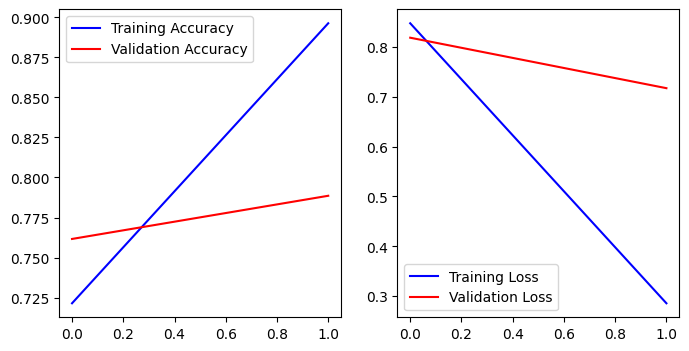

In [22]:
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']
epoch=range(len(acc))
loss=history3.history['loss']
val_loss=history3.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [23]:
predictions = model3.predict(validation_generator)
predicted_class_indices = np.argmax(predictions, axis=1)

50/50 [==============================] - 11s 221ms/step


1/1 [==============================] - 0s 331ms/step
[ 9 12 13  3  3  8 12 10  8 14  9  4  4  2 14  5  0  7  1 12 13  7  8 15
  9 14  2  3  3 11  3 12]
{'11214 Bush 3M friction with Cross axle': 0, '18651 Cross Axle 2M with Snap friction': 1, '2357 Brick corner 1x2x2': 2, '3003 Brick 2x2': 3, '3004 Brick 1x2': 4, '3005 Brick 1x1': 5, '3022 Plate 2x2': 6, '3023 Plate 1x2': 7, '3024 Plate 1x1': 8, '3040 Roof Tile 1x2x45deg': 9, '3069 Flat Tile 1x2': 10, '32123 half Bush': 11, '3673 Peg 2M': 12, '3713 Bush for Cross Axle': 13, '3794 Plate 1X2 with 1 Knob': 14, '6632 Technic Lever 3M': 15}


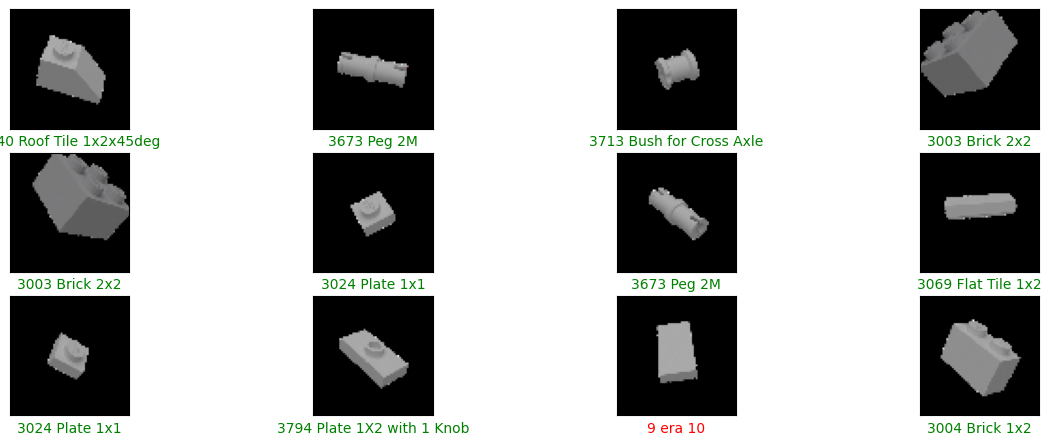

In [24]:
plt.figure(figsize=(15,9))


batch = next(validation_generator)
images, true_labels = batch

predictions = model3.predict(images)
predicted_class_indices = np.argmax(predictions, axis=1)
true_labels = np.argmax(true_labels, axis=1)

print(predicted_class_indices)
print(validation_generator.class_indices)

classes = {v: k for k, v in validation_generator.class_indices.items()}


for i in range(12):
    plt.subplot(5, 4, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])

    if predicted_class_indices[i] == true_labels[i]:
        plt.xlabel(f'{classes.get(true_labels[i], None)}', color='green')
    else:
        plt.xlabel(f'{predicted_class_indices[i]} era {true_labels[i]}', color='red')

plt.show()